# Author: Ravy Ardian Kusuma (apiwyayay)
# Created: 2024-01-11

# Title: Image Classification Paper, Rock, Scissors use CNN (Adam Optimizer)

# ---------------------------------------------------------------

Import the Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import wget
import zipfile
import os
import splitfolders
%matplotlib inline

Downloading Data

In [2]:
url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"

wget.download(url)

'rockpaperscissors.zip'

Extracting Data

In [3]:
with zipfile.ZipFile("rockpaperscissors.zip", "r") as zip_ref:
  zip_ref.extractall()

Split the Data into train/validation/test with a ratio of 0.8/0.1/0.1

In [4]:
splitfolders.ratio("rockpaperscissors/rps-cv-images", output="data", seed=42, ratio=(.8, .1, .1))

In [5]:
train_data = 'data/train'
val_data = 'data/val'
test_data = 'data/test'

Displays Paper, Rock, Scissors Images Randomly in Training Data

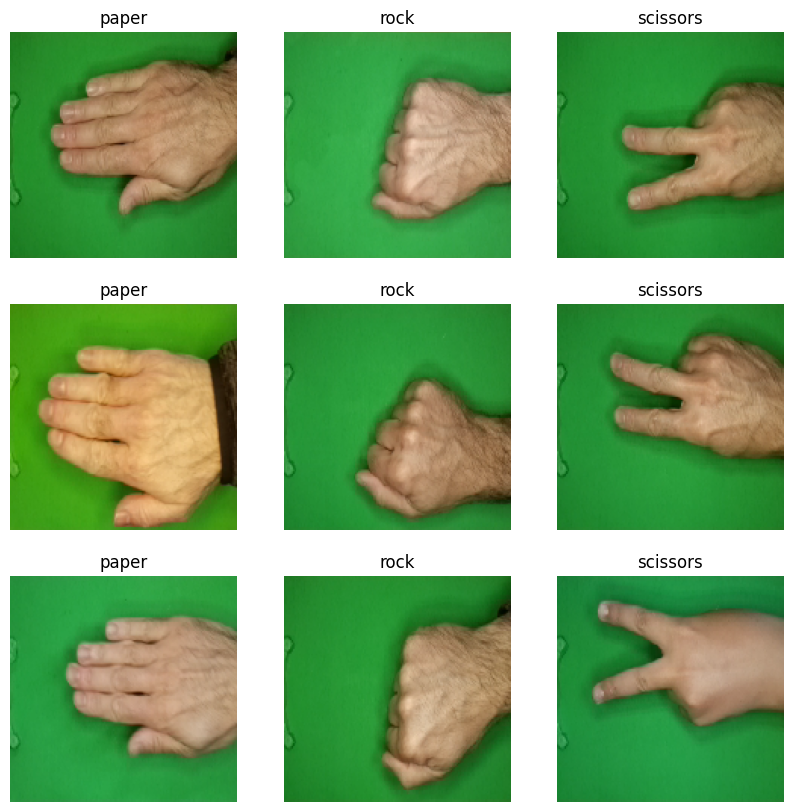

In [6]:
base_dir = "data/train"
sub_folders = os.listdir(base_dir)

plt.figure(figsize=(10, 10))

for sub in sub_folders:
    sub_class = os.path.join(base_dir, sub)
    sub_filename = [os.path.join(sub_class, fname) for fname in os.listdir(sub_class)]
    random_image = random.sample(sub_filename, min(3, len(sub_filename)))

    for i, filename in enumerate(random_image):
        img_path = filename
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0

        ax = plt.subplot(3, 3, len(sub_folders) * i + sub_folders.index(sub) + 1)
        plt.imshow(img_array)
        plt.title(sub)
        plt.axis("off")

plt.show()

Image augmentation using ImageGenerator

In [7]:
train_gen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  shear_range=0.2,
  zoom_range=0.2,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  fill_mode='nearest',
)

val_gen = ImageDataGenerator(
  rescale=1./255
)

test_gen = ImageDataGenerator(
  rescale=1./255
)

In [8]:
train_generator = train_gen.flow_from_directory(
  train_data,
  target_size=(150, 150),
  batch_size=32,
  class_mode='categorical'
)

val_generator = val_gen.flow_from_directory(
  val_data,
  target_size=(150, 150),
  batch_size=32,
  class_mode='categorical'
)

test_generator = test_gen.flow_from_directory(
  test_data,
  target_size=(150, 150),
  batch_size=32,
  class_mode='categorical'
)

Found 1749 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


Found 221 images belonging to 3 classes.


Creating Models with Sequential Models

In [9]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dropout(0.5),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(3, activation='softmax')
])
model.summary()

C:\Users\Ravy Ardian Kusuma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 36992)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 36992)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 256)               │  9,470,208 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 3)                 │        195 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 9,604,803 (36.64 MB)

 Trainable params: 9,604,803 (36.64 MB)

 Non-trainable params: 0 (0.00 B)

Perform Model Compilation Use RMSprop

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

Create a CustomCallback class to Stop Training If It Exceeds 30 Minutes or If It Exceeds 96% Accuracy and Val_Accuracy (Optional if needed)

In [11]:
class CustomCallback(Callback):
  def __init__(self, max_training_time_minutes=30, accuracy_threshold=0.96):
    super(CustomCallback, self).__init__()
    self.max_training_time_seconds = max_training_time_minutes * 60
    self.accuracy_threshold = accuracy_threshold
    self.start_time = 0

  def on_train_begin(self, logs=None):
    self.start_time = time.time()

  def on_epoch_end(self, epoch, logs=None):
    current_time = time.time() - self.start_time

    if logs.get('accuracy') >= self.accuracy_threshold and logs.get('val_accuracy') >= self.accuracy_threshold:
      print("\nReached 96% accuracy on training and validation, stopping training!")
      self.model.stop_training = True
    elif current_time > self.max_training_time_seconds:
      print(f"\nTraining time exceeds {self.max_training_time_seconds / 60} minutes, stopping training!")
      self.model.stop_training = True

Define callbacks for Timeout, Accuracy

In [12]:
custom_callback = CustomCallback(max_training_time_minutes=30, accuracy_threshold=0.96)

Training the Model

In [13]:
history = model.fit(
  train_generator,
  epochs=15,
  validation_data=val_generator,
  callbacks=[custom_callback]
)

Epoch 1/15


C:\Users\Ravy Ardian Kusuma\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 46s 727ms/step - accuracy: 0.3647 - loss: 1.0958 - val_accuracy: 0.6651 - val_loss: 0.9871
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 660ms/step - accuracy: 0.4339 - loss: 1.0310 - val_accuracy: 0.8119 - val_loss: 0.8109
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 657ms/step - accuracy: 0.5322 - loss: 0.9518 - val_accuracy: 0.9037 - val_loss: 0.6060
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 606ms/step - accuracy: 0.6731 - loss: 0.8211 - val_accuracy: 0.9679 - val_loss: 0.3879
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 640ms/step - accuracy: 0.7869 - loss: 0.6239 - val_accuracy: 0.9633 - val_loss: 0.2869
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 35s 580ms/step - accuracy: 0.8328 - loss: 0.4941 - val_accuracy: 0.9174 - val_loss: 0.2532
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 560ms/step - accuracy: 0.8407 - loss: 0.4189 - val_accuracy: 0.9587 - val_loss: 0.1364
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 34s 583ms/step - accuracy: 0.8799 - loss: 0.3532 - val_accuracy: 0.977

In [14]:
model.evaluate(test_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9706 - loss: 0.0739


[0.06992436945438385, 0.9728506803512573]

Displays Movement Graphs of Accuracy and Loss Values in Training and Validation

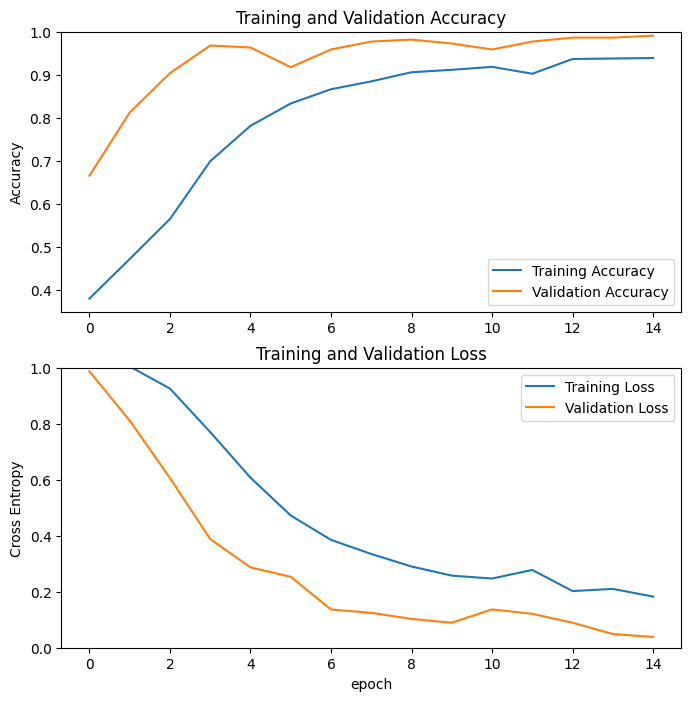

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Performing Classification Simulations by Selecting One Photo from Test Data

List of sub folders test data:
1. paper
2. rock
3. scissors
You choose number sub folder 2 with name: rock
You choose number file 35 with name: HHXLX66BbEVNYl6W.png


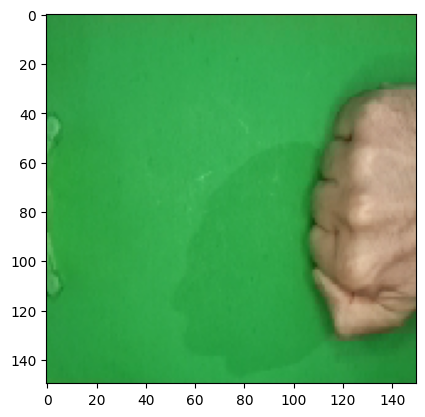

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

True Label: Rock
Prediction: Correct (Rock)


In [18]:
test_data = 'data/test'

sub_folders_test_data = os.listdir(test_data)

print("List of sub folders test data:")
for i, subfolder in enumerate(sub_folders_test_data):
    print(f"{i + 1}. {subfolder}")

try:
  subfolder_index = int(input("Enter the index number of the subfolder you want to predict: "))
  print(f"You choose number sub folder {subfolder_index} with name: {sub_folders_test_data[subfolder_index - 1]}")
  if 1 <= subfolder_index <= len(sub_folders_test_data):
    selected_subfolder = sub_folders_test_data[subfolder_index - 1]
    
    subfolder_path = os.path.join(test_data, selected_subfolder)

    files_in_subfolder = os.listdir(subfolder_path)

    file_index = int(input(f"\nEnter the index number of the image you want to predict from the {selected_subfolder} (1,2,3,...,{len(files_in_subfolder)}): "))
    print(f"You choose number file {file_index} with name: {files_in_subfolder[file_index - 1]}")
    if 1 <= file_index <= len(files_in_subfolder):
      selected_file = files_in_subfolder[file_index - 1]

      path = os.path.join(subfolder_path, selected_file)
      img = image.load_img(path, target_size=(150, 150))

      plt.imshow(img)
      plt.show()

      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      images = np.vstack([x])

      classes = model.predict(images, batch_size=10)
      
      true_label = selected_subfolder.lower()
      predicted_label = None
      
      if classes[0][0] > 0.5:
        predicted_label = 'paper'
      elif classes[0][1] > 0.5:
        predicted_label = 'rock'
      elif classes[0][2] > 0.5:
        predicted_label = 'scissors'

      print(f"\nTrue Label: {true_label.capitalize()}")
      if true_label == predicted_label:
        print(f"Prediction: Correct ({predicted_label.capitalize()})")
      else:
        print(f"Prediction: Incorrect ({predicted_label.capitalize()})")

    else:
      print("Invalid image index number. Please enter the correct index number.")

  else:
    print("Invalid subfolder index number. Please enter the correct index number.")

except ValueError:
    print("Enter a valid index number.")